In [2]:
import cv2
import numpy as np

In [3]:
import random 

In [4]:
from matplotlib import pyplot as plt

In [5]:
def imshow(title = 'image', image = None , size = 10):
    w,h = image.shape[0],image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize =(aspect_ratio*size, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

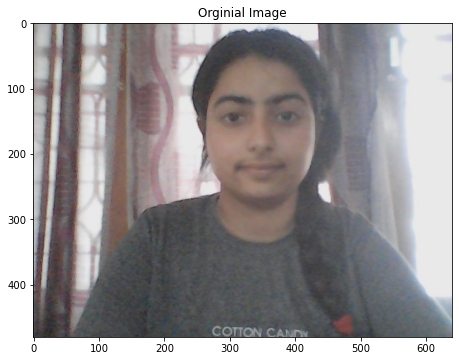

In [6]:
noisy_image = cv2.imread("C:\\Users\\baksh\\Pictures\\Camera Roll\\WIN_20230305_15_55_16_Pro.jpg")
imshow('Orginial Image', noisy_image)

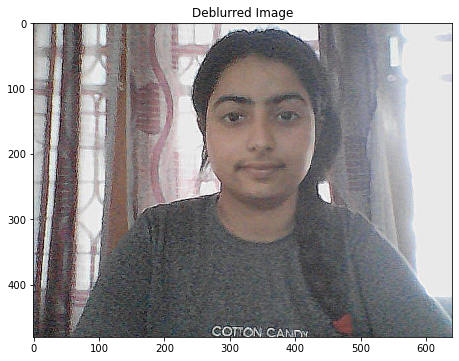

In [7]:
kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]], np.float32)
image_deblurred = cv2.filter2D(noisy_image, -1, kernel)
imshow('Deblurred Image', image_deblurred)

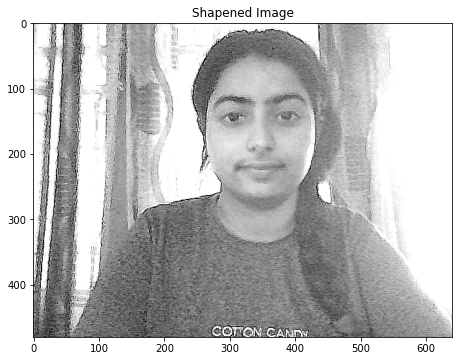

In [8]:
#image sharpening of the given image 

image_gray = cv2.cvtColor(image_deblurred, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(image_gray, (5,5),0)
image_sharp = cv2.subtract(image_gray, blur)
image_sharp = cv2.addWeighted(image_gray,1.49, image_sharp,-0.5,0)
image_sharp = cv2.cvtColor(image_sharp,cv2.COLOR_GRAY2BGR)

imshow('Shapened Image', image_sharp)

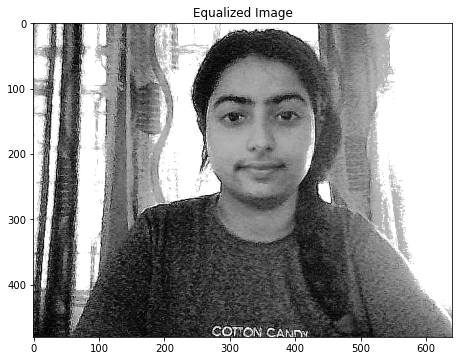

In [9]:
#equalization of the sharpened image 

gray = cv2.cvtColor(image_sharp,cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(gray)
imshow('Equalized Image',equ)

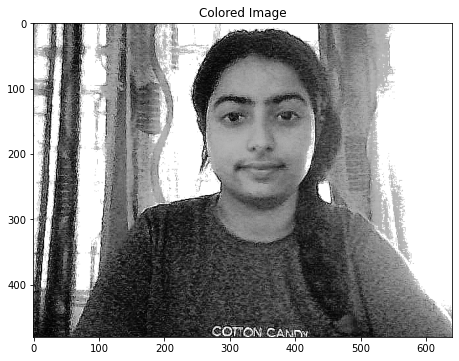

In [11]:
#adding color to the equalized image 

image_colored = cv2.cvtColor(equ,cv2.COLOR_GRAY2BGR)
imshow('Colored Image', image_colored)

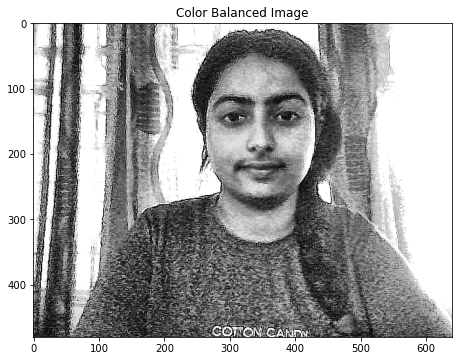

In [12]:
#Balancing Colors in the image 
lab = cv2.cvtColor(image_colored,cv2.COLOR_BGR2LAB)
l,a,b=cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit= 3.0,tileGridSize=(8,8))
l_clahe = clahe.apply(l)

lab_clahe = cv2.merge((l_clahe, a , b))

image_colorbalanced=cv2.cvtColor(lab_clahe,cv2.COLOR_LAB2BGR)
imshow('Color Balanced Image', image_colorbalanced)

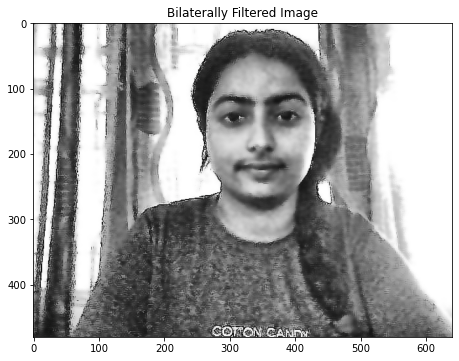

In [13]:
image_bfiltered = cv2.bilateralFilter(image_colorbalanced,d = 9,sigmaColor = 200, sigmaSpace = 200)
imshow('Bilaterally Filtered Image', image_bfiltered)

C:\Users\baksh\AppData\Local\Temp\ipykernel_27256\945523227.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if face == ():


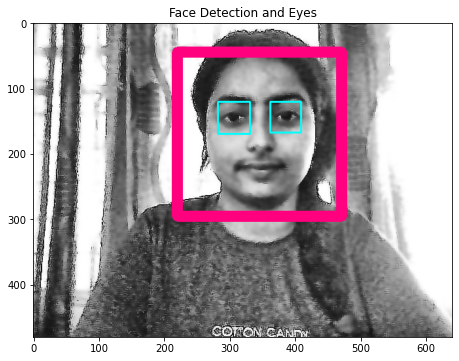

In [14]:
face_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_eye.xml")

#image = cv2.imread("C:\\Users\\baksh\\Pictures\\IMG_20211204_131154.jpg")
gray = cv2.cvtColor(image_bfiltered,cv2.COLOR_BGR2GRAY)

face = face_classifier.detectMultiScale(gray,1.3,5) 

if face == ():
    print("No faces found")

for (x,y,w,h) in face:
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image_bfiltered, 'Face', (x-w, y-h),font,0.5, (127,0, 255),2,cv2.LINE_AA)
    cv2.rectangle(image_bfiltered, (x,y), (x+w,y+h),(127,0,255),15)
    roi_gray= gray[y:y+h,x:x+w]
    roi_color=image_bfiltered[y:y+h,x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray,1.2,3)
    for (ex,ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
    
imshow('Face Detection and Eyes',image_bfiltered)

C:\Users\baksh\AppData\Local\Temp\ipykernel_27256\2341768585.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if face == ():


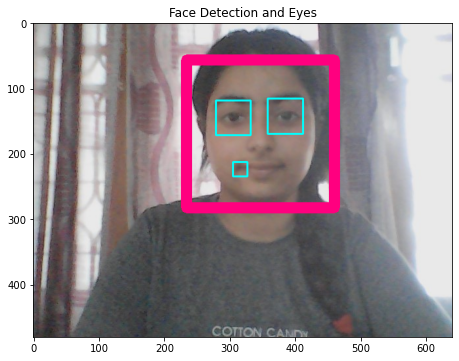

In [15]:
face_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_eye.xml")

#image = cv2.imread("C:\\Users\\baksh\\Pictures\\IMG_20211204_131154.jpg")
gray = cv2.cvtColor(noisy_image,cv2.COLOR_BGR2GRAY)

face = face_classifier.detectMultiScale(gray,1.3,5) 

if face == ():
    print("No faces found")

for (x,y,w,h) in face:
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(noisy_image, 'Face', (x-w, y-h),font,0.5, (127,0, 255),2,cv2.LINE_AA)
    cv2.rectangle(noisy_image, (x,y), (x+w,y+h),(127,0,255),15)
    roi_gray= gray[y:y+h,x:x+w]
    roi_color=noisy_image[y:y+h,x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray,1.2,3)
    for (ex,ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
    
imshow('Face Detection and Eyes',noisy_image)